# Cohort Analysis : 
- tracking user behaviors on the product.
- The time period can be changed from month to week even day-basis.


# https://medium.com/@henryfeng/know-users-behaviors-better-with-cohort-analysis-in-python-6c0dfc373963

Methodology :
- Data set exploration and cleaning
- Create a cohort and conduct cohort analysis
- Visualize the cohort analysis results

#  “Online Retail Data Set” from the UCI Machine Learning Repository
#  Transaction between 12/01/2010 and 12/09/2011 for UK-based online retail.

# Load necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

# Load data


In [2]:
from google.colab import drive
# import only specific drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
# Read dataset
df = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Tutorial/Online Retail.xlsx')

# Data cleaning


In [4]:
# Check top 5 rows of data
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 8 features but use only 4 : quantity, invoice date, unit price, customer ID 
# total 541,909 transactions

In [5]:
df.shape

(541909, 8)

# Check missing value 

In [6]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Drop 135,080 rows without customer ID
# ---> total transactions = 406,829

In [7]:
df1 = df.dropna(subset=['CustomerID'])
df1.shape

(406829, 8)

In [8]:
# InvoiceDate column is already shown in datetime type, so no need to conduct further transformation.
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


# Remove duplicate rows, keeping the first one





In [9]:
df1 = df1.drop_duplicates()

In [10]:
df1.shape

(401604, 8)

# Check distribution of the numeric variables — Quantity and UnitPrice

In [11]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


# Filter only Quantity > 0, UnitPrice > 0

In [12]:
df1 = df1[df1['Quantity'] > 0]
df1 = df1[df1['UnitPrice'] > 0]

In [13]:
df1.shape

(392692, 8)

In [14]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


#BoxPlot Quantity , UnitPrice

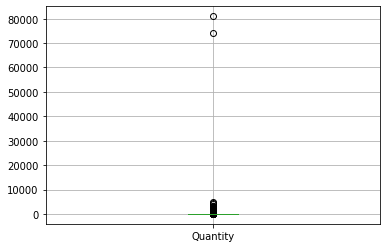

In [15]:
df1.boxplot(column =['Quantity']) 

# Remove outliers, Quantity > 70000

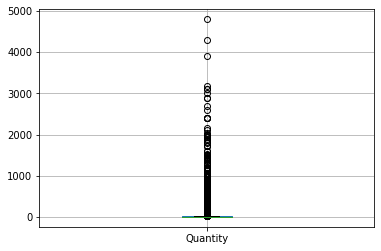

In [16]:
df1 = df1[df1['Quantity'] < 70000]
df1.boxplot(column =['Quantity']) 

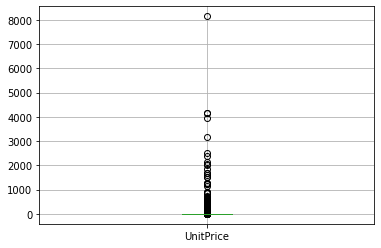

In [17]:
df1.boxplot(column = ['UnitPrice'])

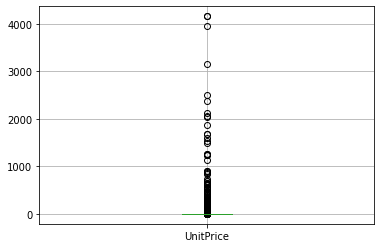

In [18]:
df1 = df1[df1['UnitPrice'] < 8000]
df1.boxplot(column =['UnitPrice']) 

In [19]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,392689.000000,392689.000000,392689.000000
mean,12.724550,3.105194,15287.846520
std,43.083696,18.055047,1713.538259
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,4800.000000,4161.060000,18287.000000


# Create Cohort & Conduct Cohort Analysis
# - create InvoiceMonth โดยใช้ get_month ไปดึง month จาก InvoiceDate
# - create CohortMonth (first month for the specific user ID when that user shopped at this online retailer หรือ เรียกว่า acquisition month)

In [20]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
df1['InvoiceMonth'] = df1['InvoiceDate'].apply(get_month)
# groupby and transform are used for creating the cohort month.
df1['CohortMonth'] = df1.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392689 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392689 non-null  object        
 1   StockCode     392689 non-null  object        
 2   Description   392689 non-null  object        
 3   Quantity      392689 non-null  int64         
 4   InvoiceDate   392689 non-null  datetime64[ns]
 5   UnitPrice     392689 non-null  float64       
 6   CustomerID    392689 non-null  float64       
 7   Country       392689 non-null  object        
 8   InvoiceMonth  392689 non-null  datetime64[ns]
 9   CohortMonth   392689 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(1), object(4)
memory usage: 33.0+ MB


# Create cohort index (month difference between invoice month and cohort month ) for each row [or the month lapse between that specific transaction and the first transaction that user made on the website.]

In [22]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
invoice_year, invoice_month, _ = get_date(df1, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date(df1, 'CohortMonth')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
# month_diff + 1 ---> cohortindex start at 1 
df1['CohortIndex'] = year_diff * 12 + month_diff + 1
df1.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
24200,538343,22111,SCOTTIE DOG HOT WATER BOTTLE,12,2010-12-10 14:29:00,4.95,13448.0,United Kingdom,2010-12-01,2010-12-01,1
75892,542613,21974,SET OF 36 PAISLEY FLOWER DOILIES,3,2011-01-30 14:36:00,1.45,17431.0,United Kingdom,2011-01-01,2011-01-01,1
327773,565726,82600,NO SINGING METAL SIGN,12,2011-09-06 11:58:00,2.10,14360.0,United Kingdom,2011-09-01,2011-09-01,1
80064,543015,22385,JUMBO BAG SPACEBOY DESIGN,20,2011-02-02 13:46:00,1.95,14188.0,United Kingdom,2011-02-01,2011-02-01,1
212976,555515,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2011-06-05 10:47:00,1.69,17690.0,United Kingdom,2011-06-01,2010-12-01,7


# Create 1st Cohort: User number & Retention Rate
# e.g. The 13th column and 2010–12–1 row means 260 users out of 948 users were still buying things after the 13 months from 2010/12/1

In [23]:
cohort_data = df1.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_count = cohort_data.pivot_table(index = 'CohortMonth',
                                       columns = 'CohortIndex',
                                       values = 'CustomerID')
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,416.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Transform the absolute number into percentage ---> retention rate 

In [24]:
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis = 0)
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.7,23.1,32.2,28.8,24.8,24.3,30.0,32.7,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.2,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


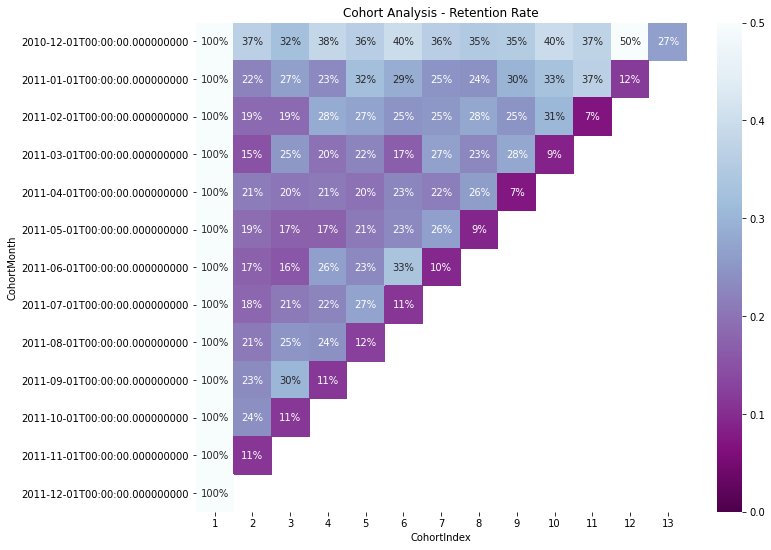

In [25]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "BuPu_r")
plt.show()

#  Visualize the retention rate with Seaborn heatmap to make the result more understandable.

# From the graph
- 2010-12 cohort is the strongest
-  on 2011/11 some strategies might be implemented to increase the return users.
-  About 50% of user from 2010/12 cohort return on 2011/11. Marketing analysts or product analysts might further investigate if some campaigns or feature changes that lead to the higher retention.
- Overall there is not a good retention for the users (the percentage of customers going from month to month are quite low)



# Create the 2nd Cohort: Average Quantity Sold
- see how the purchase quantity changes along with months

In [26]:
cohort_data2 = df1.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean().reset_index()
average_quantity  = cohort_data2.pivot_table(index = 'CohortMonth',
                                            columns = 'CohortIndex',
                                       values = 'Quantity').round(1)
average_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,12.1,15.7,15.7,15.9,13.6,14.9,16.1,15.6,18.2,17.7,19.0,13.6,15.4
2011-01-01,10.6,13.5,12.7,15.3,12.8,15.4,15.0,15.0,11.6,10.6,9.6,10.2,NaN
2011-02-01,11.2,13.7,19.0,12.0,12.3,12.3,13.6,13.4,11.0,12.4,13.4,NaN,NaN
2011-03-01,10.0,11.7,13.3,10.1,13.8,13.0,13.5,13.9,11.3,9.7,NaN,NaN,NaN
2011-04-01,10.0,10.4,9.8,11.9,12.0,8.7,10.0,9.7,7.6,NaN,NaN,NaN,NaN
2011-05-01,11.5,9.7,14.2,12.8,11.2,8.8,10.8,7.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.7,14.7,10.9,13.7,10.7,10.0,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.9,13.8,7.4,8.2,6.2,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.1,6.2,5.4,6.2,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


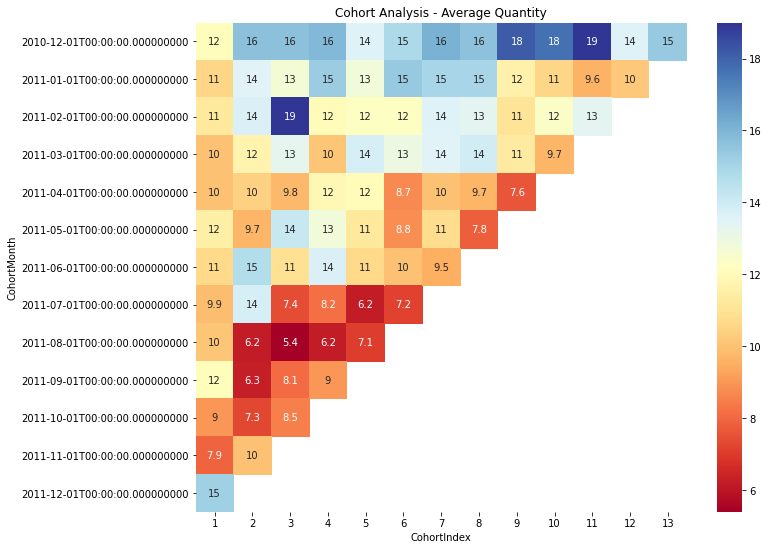

In [27]:
# visualization
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Average Quantity')
sns.heatmap(data = average_quantity, 
            annot = True, 
            cmap = "RdYlBu")

plt.show()

# It is observed that
- within the recent cohort/month, the average quantity on the website was facing a decline. It is a warning signal that users stop buying merchandise on the website. The reason needs further investigation.

# Create the 3rd Cohort: Average Sales

In [28]:
df1['TotalSale'] = df1['Quantity'] * df1['UnitPrice']
cohort_data3 = df1.groupby(['CohortMonth', 'CohortIndex'])['TotalSale'].mean().reset_index()
average_sales  = cohort_data3.pivot_table(index = 'CohortMonth',
                                           columns = 'CohortIndex',
                                      values = 'TotalSale').round(1)
average_sales

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,22.2,27.3,26.9,27.2,21.2,27.5,28.3,27.4,29.3,33.5,34.0,23.6,25.8
2011-01-01,19.8,25.1,21.0,31.2,22.5,26.3,25.2,25.5,19.1,22.3,19.7,19.8,NaN
2011-02-01,17.9,20.8,21.5,19.4,17.7,17.0,22.2,22.9,18.8,22.2,23.5,NaN,NaN
2011-03-01,17.6,21.1,22.7,18.0,21.1,19.0,22.0,20.0,16.8,13.2,NaN,NaN,NaN
2011-04-01,17.0,21.0,19.5,18.7,19.5,15.0,15.3,16.0,12.3,NaN,NaN,NaN,NaN
2011-05-01,20.5,17.3,22.2,20.9,18.6,14.1,17.0,14.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,24.0,16.3,19.9,20.4,15.3,16.7,13.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,15.0,23.5,11.8,13.0,10.9,11.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.5,13.2,12.5,15.9,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


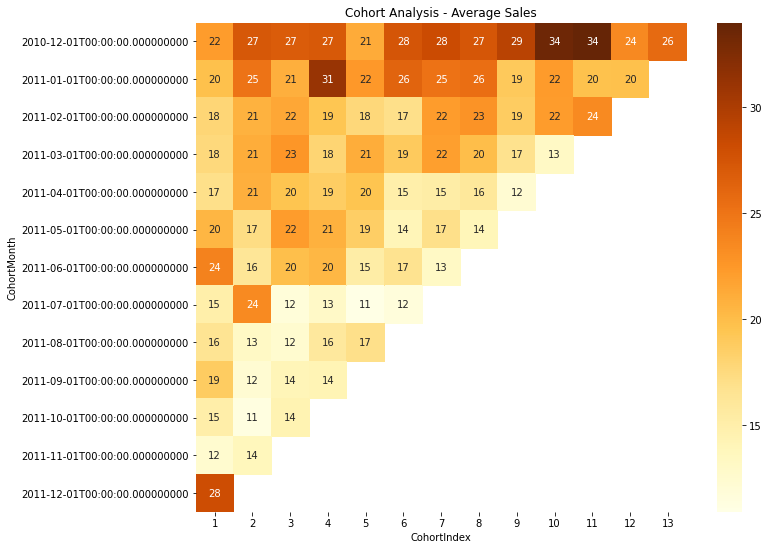

In [29]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Average Sales')
sns.heatmap(data = average_sales, 
            annot = True, 
            cmap = "YlOrBr")
plt.show()

# The situation for average sales is parallel with the average quantity, which the retailer faces a significant decline in recent months. How to sustain the buying behaviors will be the issue with thinking for the product/marketing team.